# System Neural Diversity 
## An Ensemble

In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from collections import defaultdict
import networkx as nx

## Single Agent

In [ ]:
# embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9]
# agent_hilbert = Agent('agent_hilbert_space',
#                       'documents/HilbertSpaceMulti.pdf', 1, embedding_params, False)
# agent_hilbert.chat_bot.one_question(
#     "Imagine how hilbert space could be used in a neural network for neuron representation?")

## Pack

In [2]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = "chroma_db/agent_norbert"
viz_quant = "chroma_db/agent_quant"
cot_path = "chroma_db/agent_cot"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.8]
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_quant', viz_quant, 0, True],
    ['agent_norbert', norbet_cog, 0, True],
    ['agent_cot', cot_path, 0, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_ltoa is chroma_db/agent_ltoa

🔥  Conjuring up agent_snd  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_snd is chroma_db/agent_snd

🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_foundation is chroma_db/agent_foundation

🔥  Conjuring up agent_quant  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_quant is chroma_db/agent_quant

🔥  Conjuring up agent_norbert  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_norbert is chr

In [3]:
edges = test_pack.update_weighted_edges(
    question="Imagine how a neuron for a neural network may be reimagined based on the text.",
    weighted_adj_matrix=None, k=3)
print(edges)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

monte carlo finished
defaultdict(None, {'agent_ltoa': ['agent_snd', 'agent_foundation'], 'agent_snd': ['agent_ltoa', 'agent_foundation'], 'agent_foundation': ['agent_ltoa', 'agent_snd'], 'agent_quant': ['agent_ltoa', 'agent_snd', 'agent_foundation'], 'agent_norbert': ['agent_ltoa', 'agent_snd', 'agent_foundation'], 'agent_cot': ['agent_ltoa', 'agent_snd', 'agent_foundation']})


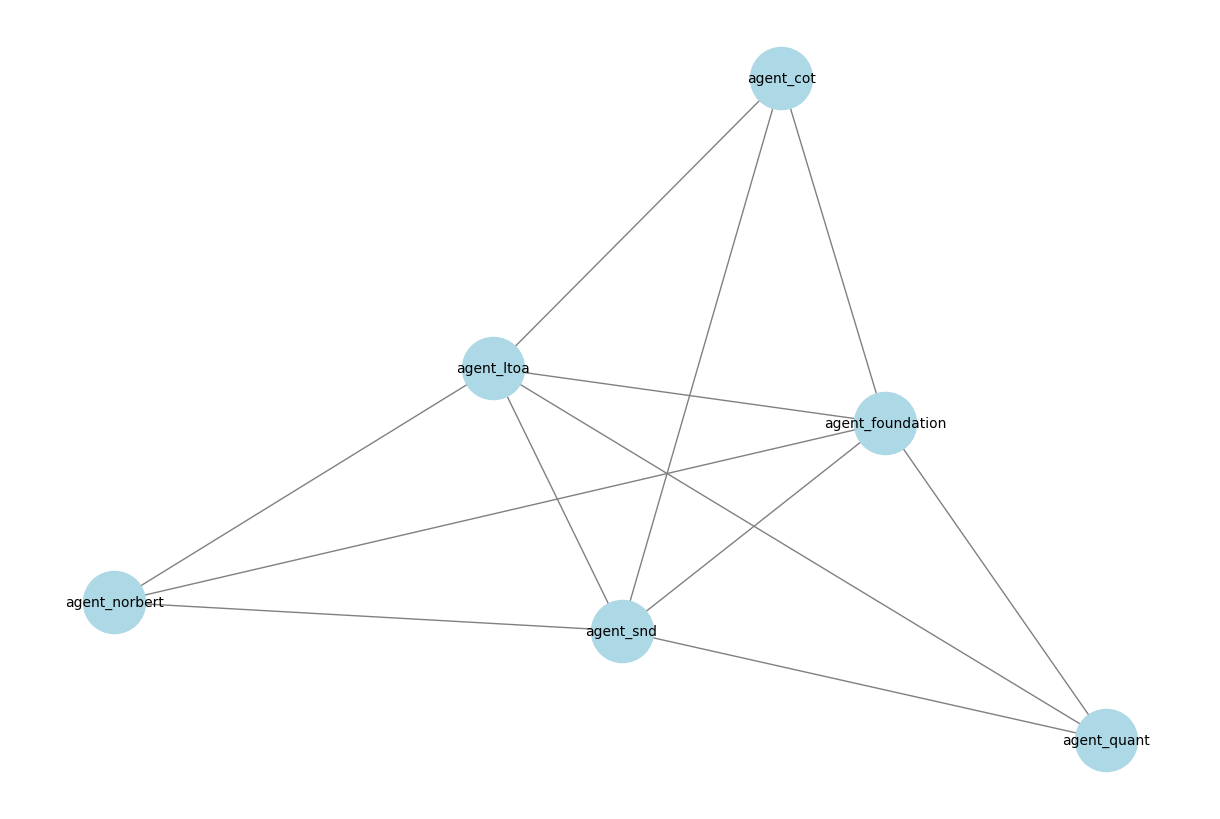

In [4]:
test_pack.graph()

In [5]:
rounds = 1
k = 3
results = []
question = "Imagine how a neuron for a neural network may be reimagined based on the text."

for _ in range(rounds):
    round_res = test_pack.one_question(question)
    # Extract responses from individual agents
    responses = [(agent_name, round_res[agent_name])
                 for agent_name in test_pack.agent_names if agent_name in round_res]
    weights = defaultdict()
    if responses:
        # Processing each agent's response
        for agent_name, response in responses:

            prob_vector = test_pack.metrics._prob_vectors(response)
            entropy = test_pack.metrics.shannon_entropy(prob_vector)
            diversity = test_pack.metrics.true_diversity(prob_vector)
            wasserstein = test_pack.metrics.wasserstein(prob_vector)
            test_pack.metrics.shannon_entropy_scores.append(entropy)
            test_pack.metrics.true_diversity_scores.append(diversity)
            agent_name.state = [entropy, diversity, wasserstein]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

edges = defaultdict()

for idx, node in enumerate(test_pack.agents):
    delta_edges = test_pack.knn.search(node.state, k)
    test_pack.agents[idx].edges.append([n.name for n in delta_edges])
    edges[node.name] = [node.name for node in delta_edges]

test_pack.edges = edges
test_pack.graph()